In [2]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
import pandas as pd
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

Filename: blhyi_cztidata/AS1G05_230T02_9000000548cztM0_level2_quad_clean_Q3.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     63   128R x 4C   [D, E, E, E]   
Filename: blhyi_cztidata/AS1G05_230T02_9000000548cztM0_level2_quad_clean_Q3.pha
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   ()      
  1  SPECTRUM      1 BinTableHDU     74   512R x 3C   [1J, 1E, 1E]   


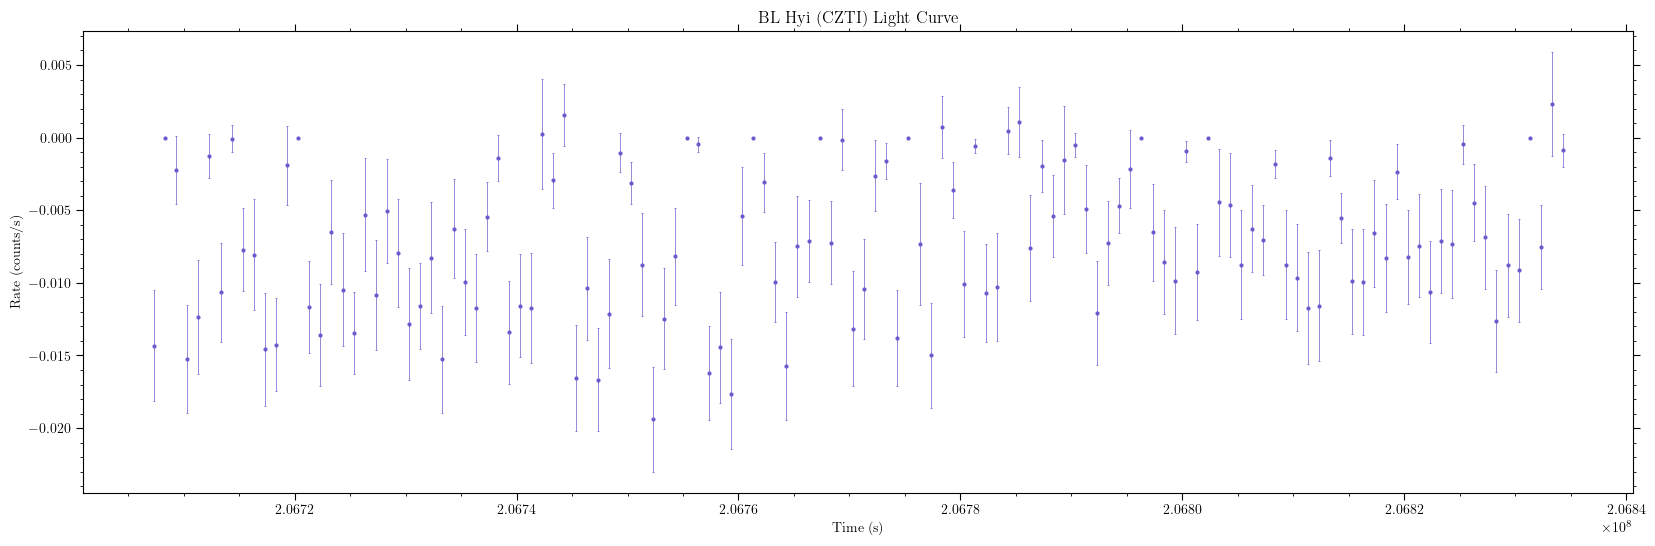

In [3]:
hdu = fits.open('blhyi_cztidata/AS1G05_230T02_9000000548cztM0_level2_quad_clean_Q3.lc')
hdu.info()
time = hdu[1].data['TIME']
rate = hdu[1].data['RATE']
spectrum = fits.open('blhyi_cztidata/AS1G05_230T02_9000000548cztM0_level2_quad_clean_Q3.pha')
spectrum.info()
energy = spectrum[1].data['CHANNEL']
counts = spectrum[1].data['COUNTS']
# plt.figure(figsize=(20, 6))
# plt.step(time, rate, color='slateblue')
# plt.xlabel('Energy (keV)')
# plt.ylabel('Counts')
# plt.title('BL Hyi (CZTI) Spectrum')
# plt.show()
plt.figure(figsize=(20, 6))
plt.errorbar(time, rate, yerr=hdu[1].data['ERROR'], fmt='o', ms=2, elinewidth=0.5, capsize=1, capthick=0.5, color='slateblue')
plt.xlabel('Time (s)')
plt.ylabel('Rate (counts/s)')
plt.title('BL Hyi (CZTI) Light Curve')
plt.show()

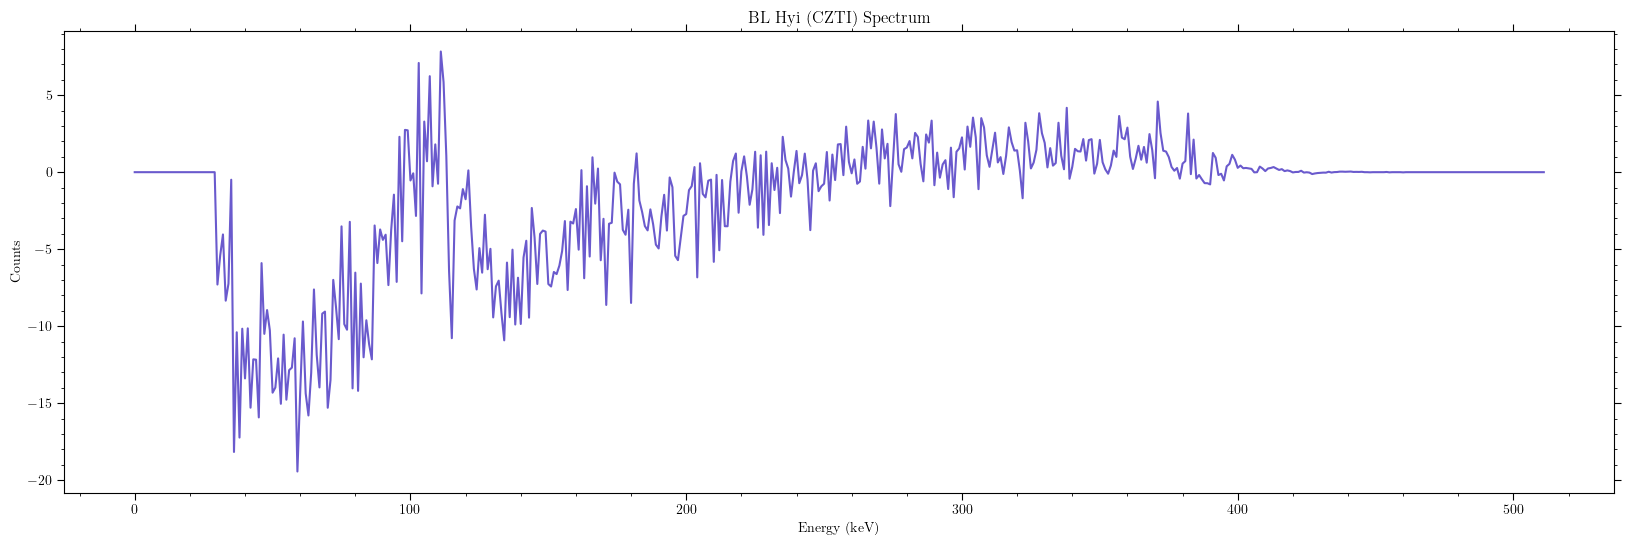

In [4]:
plt.figure(figsize=(20, 6))
plt.plot(energy, counts, color='slateblue')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('BL Hyi (CZTI) Spectrum')
plt.show()

Filename: blhyi_cztidata/AS1G05_230T02_9000000548cztM0_level2_quad_clean.dpi
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      65   ()      
  1  Q0            1 ImageHDU        67   (64, 64)   float32   
  2  Q1            1 ImageHDU        67   (64, 64)   float32   
  3  Q2            1 ImageHDU        67   (64, 64)   float32   
  4  Q3            1 ImageHDU        67   (64, 64)   float32   
  5  FULL_DPI      1 ImageHDU        40   (128, 128)   float32   


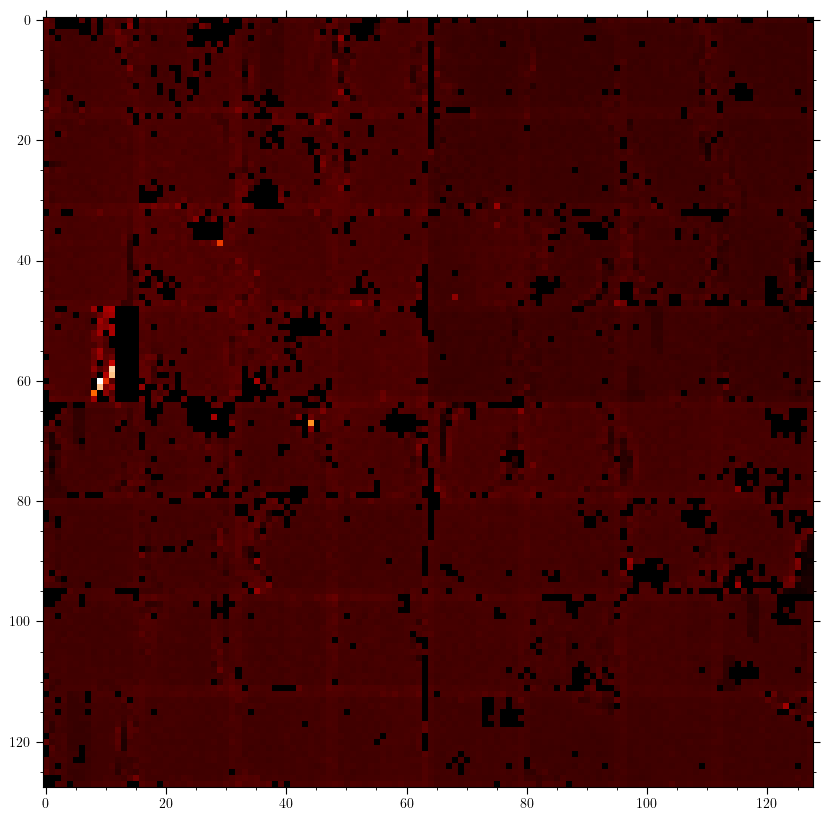

In [5]:
dpi = fits.open('blhyi_cztidata/AS1G05_230T02_9000000548cztM0_level2_quad_clean.dpi')
dpi.info()
dpi_data = dpi[5].data
plt.figure(figsize=(10, 10))
plt.imshow(dpi_data, cmap='gist_heat')

In [3]:
data = '/home/ravioli/astro/ksp/uvit/20160720_G05_230T02_9000000548_level2/uvit/RAS_VIS/uvt_01/F_01/curve_3145_1831_AS1G05_230T02_9000000548uvtFIIPC00F1_l2ce.dat'
lc = np.loadtxt(data)
plt.figure(figsize=(10,5), dpi=200)
plt.errorbar(lc[:,0], lc[:,1], yerr=lc[:,2], fmt='o', ms=2, elinewidth=0.5, capsize=1, capthick=0.5, color='slateblue')
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('BL Hyi (UVIT) Light Curve', fontsize=20, pad=20)
plt.show()

NameError: name 'pd' is not defined

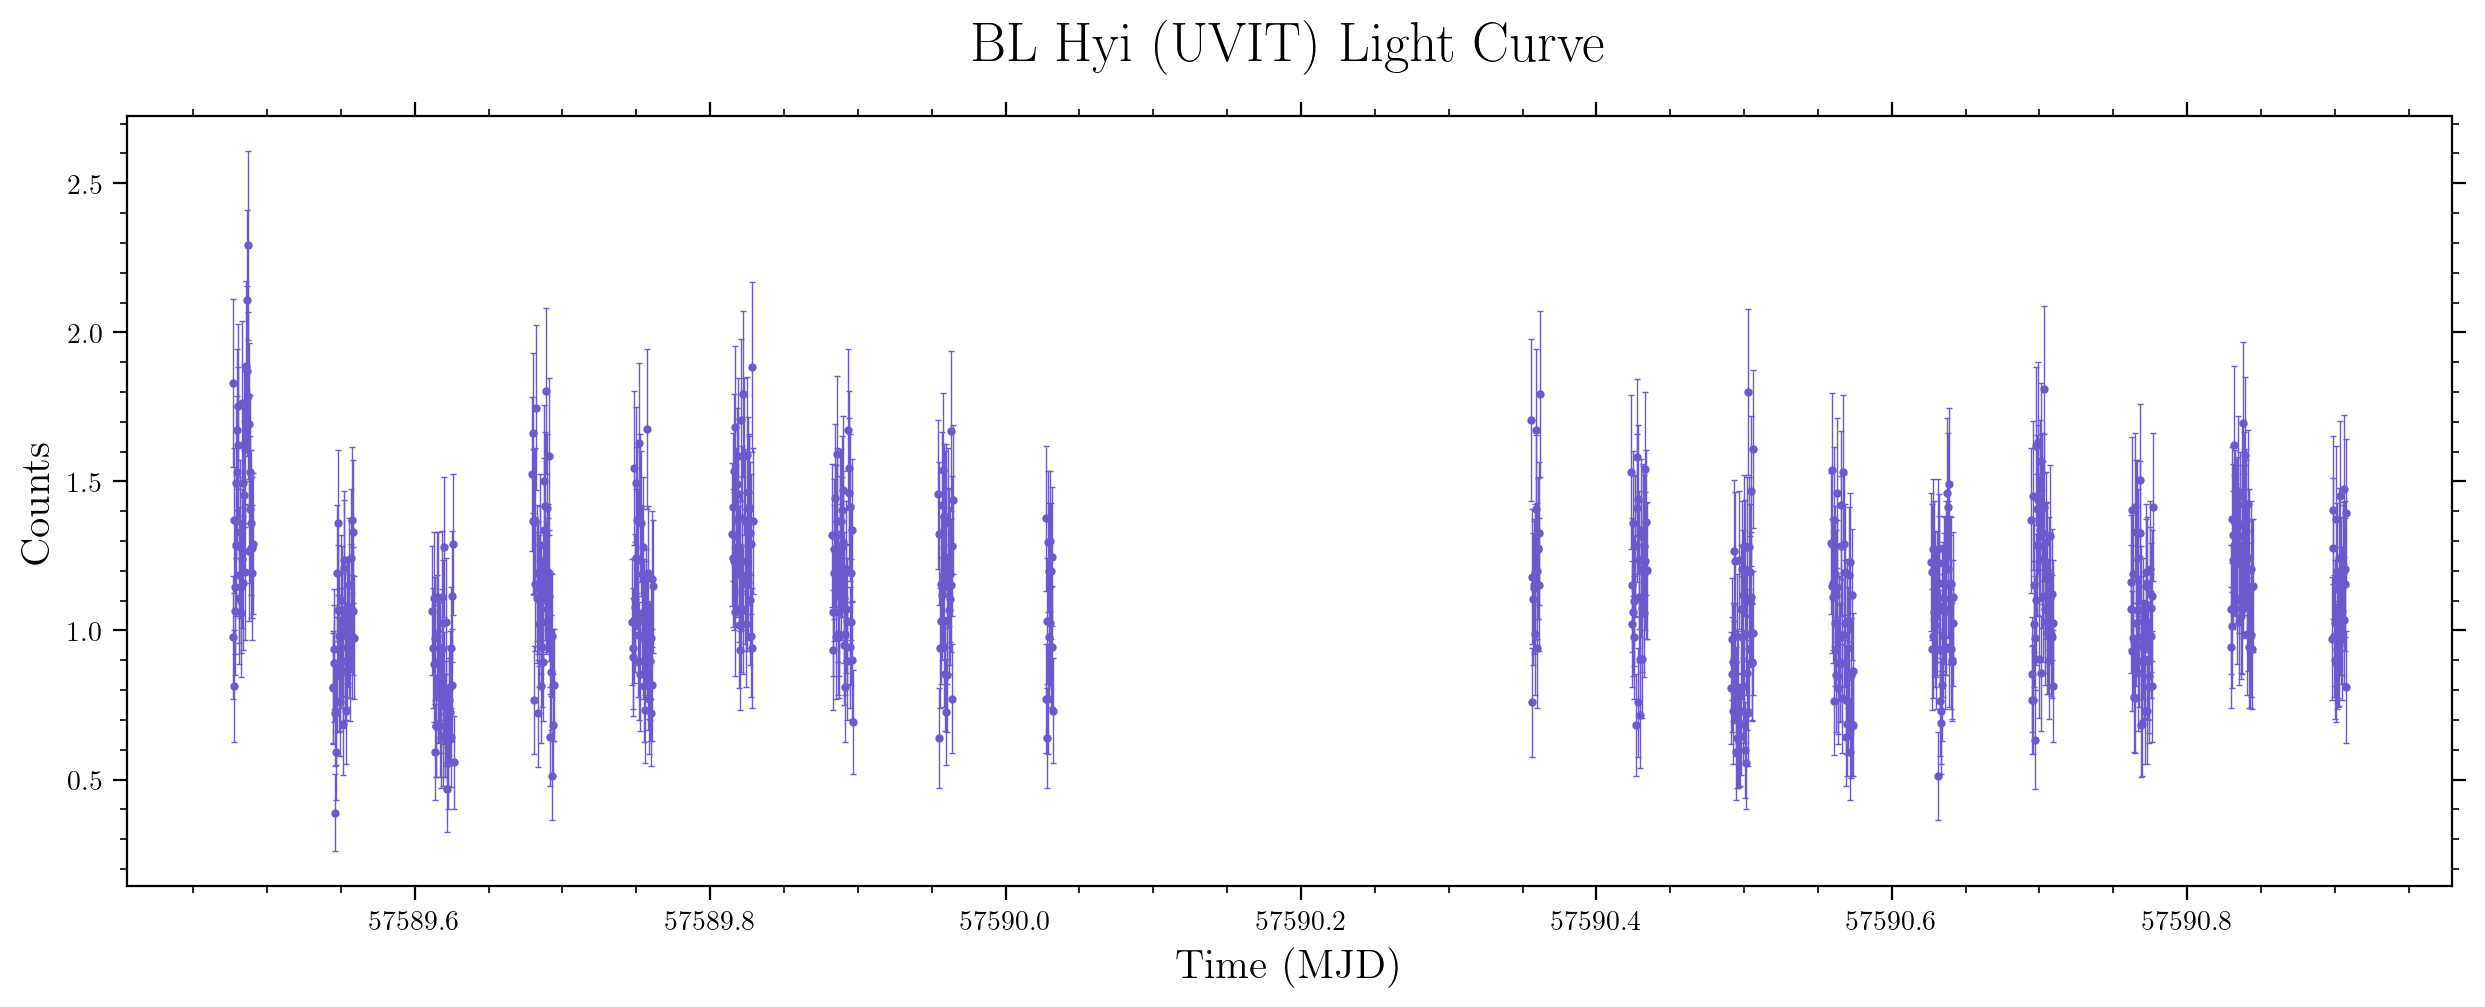

In [4]:
import pandas as pd
data = '/home/ravioli/astro/ksp/uvit/lc.txt'
lc = pd.DataFrame(pd.read_csv(data))
x = lc['MJD']
y = lc[' counts']
err = lc[' counts_err']
plt.figure(figsize=(15,5), dpi=200)
plt.errorbar(x, y, err, fmt='o', ms=2, elinewidth=0.5, capsize=1, capthick=0.5, color='slateblue')
plt.xlabel('Time (MJD)', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('BL Hyi (UVIT) Light Curve', fontsize=20, pad=20)
plt.show()